**任务1：报名比赛，下载比赛数据集并完成读取**

- **步骤1** ：登录&报名比赛：https://aistudio.baidu.com/aistudio/competition/detail/45/0/task-definition
- **步骤2** ：下载比赛数据集
- **步骤3** ：使用`Pandas`完成数据读取。

In [1]:
# !wget https://dataset-bj.cdn.bcebos.com/qianyan/bq_corpus.zip
# !wget https://dataset-bj.cdn.bcebos.com/qianyan/lcqmc.zip
# !wget https://dataset-bj.cdn.bcebos.com/qianyan/paws-x-zh.zip

In [2]:
DataSet_Path = {
    'lcqmc':
            {'train':'data/lcqmc/train.tsv',
             'dev':'data/lcqmc/dev.tsv',
             'test':'data/lcqmc/test.tsv'},
    'paws':
            {'train':'data/paws-x-zh/train.tsv',
             'dev':'data/paws-x-zh/dev.tsv',
             'test':'data/paws-x-zh/test.tsv'},
    'corpus':
            {'train':'data/bq_corpus/train.tsv',
             'dev':'data/bq_corpus/dev.tsv',
             'test':'data/bq_corpus/test.tsv'}
}

In [3]:
# !wget https://raw.githubusercontent.com/goto456/stopwords/master/cn_stopwords.txt

In [4]:
with open('data/cn_stopwords.txt', 'r') as f:
    stopwords = []
    for word in f.readlines():
        stopwords.append(word.strip())

In [5]:
Train_Data_Style = ['text1', 'text2', 'label']
Dev_Data_Style = ['text1', 'text2', 'label']
Test_Data_Style = ['text1', 'text2']

In [6]:
import pandas as pd
import numpy as np

corpus_train_df = pd.read_csv(DataSet_Path['corpus']['train'], sep='\t\n', header=None)
text1 = np.asarray([i.split('\t')[0] for i in corpus_train_df[0]])
text2 = np.asarray([i.split('\t')[1] for i in corpus_train_df[0]])
label = np.asarray([i.split('\t')[2] for i in corpus_train_df[0]])
corpus_train_df['text1'] = text1
corpus_train_df['text2'] = text2
corpus_train_df['label'] = label.astype(int)
corpus_train_df.drop(corpus_train_df.columns[0], axis=1, inplace=True)

corpus_dev_df = pd.read_table(DataSet_Path['corpus']['dev'], header=None)
corpus_dev_df.columns = Dev_Data_Style

corpus_test_df = pd.read_table(DataSet_Path['corpus']['test'], header=None)
corpus_test_df.columns = Test_Data_Style

/home/kuan/.local/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [7]:
corpus_train_df.head()

,text1,text2,label
0,用微信都6年，微信没有微粒贷功能,4。号码来微粒贷,0
1,微信消费算吗,还有多少钱没还,0
2,交易密码忘记了找回密码绑定的手机卡也掉了,怎么最近安全老是要改密码呢好麻烦,0
3,你好我昨天晚上申请的没有打电话给我今天之内一定会打吗？,什么时候可以到账,0
4,"“微粒贷开通""",你好，我的微粒贷怎么没有开通呢,0


In [8]:
corpus_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text1   100000 non-null  object
 1   text2   100000 non-null  object
 2   label   100000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


In [9]:
corpus_train_df.label.value_counts()

0    50000
1    50000
Name: label, dtype: int64

In [10]:
corpus_dev_df.head()

,text1,text2,label
0,不要借了我是试试看能否操作的,借款审核期间能否取消借款,0
1,亲怎样才能在钱包里有微粒货的图标呢,借不到,0
2,你好，我还款银行怎么更换,怎么更换绑定还款的卡,1
3,我的借贷额度，怎么减少了呢？,微粒贷额度怎么才能降低,0
4,什么时候可以知道借款成功,2.多笔借款,0


In [11]:
corpus_dev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text1   10000 non-null  object
 1   text2   10000 non-null  object
 2   label   10000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [12]:
corpus_dev_df.label.value_counts()

0    5000
1    5000
Name: label, dtype: int64

In [13]:
corpus_test_df.head()

,text1,text2
0,为什么我无法看到额度,为什么开通了却没有额度
1,为啥换不了,为两次还都提示失败呢
2,借了钱，但还没有通过，可以取消吗？,可否取消
3,为什么我申请额度输入密码就一直是那个页面,为什么要输入支付密码来验证
4,今天借明天还款可以？,今天借明天还要手续费吗


In [14]:
corpus_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text1   10000 non-null  object
 1   text2   10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


**任务2：对句子对提取TFIDF以及统计特征，训练和预测**

- 参考代码：https://www.kaggle.com/anokas/data-analysis-xgboost-starter-0-35460-lb

- **步骤1** ：对句子对（句子A和句子B统计）如下特征：

  - 句子A包含的字符个数、句子B包含的字符个数
  - 句子A与句子B的编辑距离
  - 句子A与句子B共有单词的个数
  - 句子A与句子B共有字符的个数
  - 句子A与句子B共有单词的个数 / 句子A字符个数
  - 句子A与句子B共有单词的个数 / 句子B字符个数

- **步骤2** ：计算TFIDF，并对句子A和句子B进行特征转换

- **步骤3** ：计算句子A与句子B的TFIDF向量的内积距离

- **步骤4** ：将上述特征送入分类模型，训练并预测，将结果预测提交到比赛网站。

In [15]:
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer


def edit_distance(row):
    s = row['text1']
    t = row['text2']
    m, n = len(s), len(t)
    dist = [[0] * (n+1) for _ in range(m+1)]
    for i in range(1, m+1):
        dist[i][0] = i
    for j in range(1, n+1):
        dist[0][j] = j
    for i in range(1, m+1):
        for j in range(1, n+1):
            if s[i-1] == t[j-1]:
                dist[i][j] = dist[i-1][j-1]
            else:
                dist[i][j] = min(dist[i-1][j-1],
                                 dist[i-1][j],
                                 dist[i][j-1]) + 1
    return dist[-1][-1]

def common_word(row):
    sset = set(row['cut_text1'].split(' '))
    tset = set(row['cut_text2'].split(' '))
    return len(sset & tset)

def common_char(row):
    sset = set(list(row['text1']))
    tset = set(list(row['text2']))
    return len(sset & tset)

def cut_text(text):
    remove_char_list = list('[·’!"#$%&\'()*+,-./:;<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~]+')
    return ' '.join([word for word in jieba.cut(text) if word not in remove_char_list and word not in stopwords])

def feature_extraction(df):
    # 句子A包含的字符个数
    df['text1_len'] = df['text1'].apply(len)
    # 句子B包含的字符个数
    df['text2_len'] = df['text2'].apply(len)
    # 句子A与句子B的编辑距离
    df['edit_distance'] = df.apply(edit_distance, axis=1)
    # 句子A与句子B共有单词的个数
    df['cut_text1'] = df['text1'].apply(cut_text)
    df['cut_text2'] = df['text2'].apply(cut_text)
    df['common_word'] = df.apply(common_word, axis=1)
    # 句子A与句子B共有字符的个数
    df['common_char'] = df.apply(common_char, axis=1)
    # 句子A与句子B共有单词的个数 / 句子A字符个数
    df['common_1'] = df.apply(lambda row: row['common_word'] / len(row['text1']), axis=1 )
    # 句子A与句子B共有单词的个数 / 句子B字符个数
    df['common_2'] = df.apply(lambda row: row['common_word'] / len(row['text2']), axis=1)

In [16]:
feature_extraction(corpus_train_df)
feature_extraction(corpus_dev_df)
feature_extraction(corpus_test_df)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.481 seconds.
Prefix dict has been built successfully.


In [17]:
from scipy.spatial.distance import cosine

def tfidf_extraction(vec, df):
    # 计算TFIDF，并对句子A和句子B进行特征转换
    text1_tfidf = vec.transform(df['cut_text1'])
    text2_tfidf = vec.transform(df['cut_text2'])
    # 计算句子A与句子B的TFIDF向量的内积距离
    df['tfidf_sim'] = [cosine(tfidf1.toarray(), tfidf2.toarray()) for tfidf1, tfidf2 in zip(text1_tfidf, text2_tfidf)]

In [18]:
corpus_vec = TfidfVectorizer()
train_corpus = pd.concat([corpus_train_df['cut_text1'] + corpus_train_df['cut_text2']], axis=0)
corpus_vec.fit(train_corpus)

tfidf_extraction(corpus_vec, corpus_train_df)
tfidf_extraction(corpus_vec, corpus_dev_df)
tfidf_extraction(corpus_vec, corpus_test_df)

/home/kuan/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:699: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [19]:
corpus_train_df.fillna(0, inplace=True)
corpus_dev_df.fillna(0, inplace=True)
corpus_test_df.fillna(0, inplace=True)

In [20]:
features = ['text1_len', 'text2_len', 'edit_distance', 'common_word', 'common_char', 'common_1','common_2', 'tfidf_sim']

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(corpus_train_df[features], corpus_train_df['label'])
corpus_train_score = pipe.score(corpus_train_df[features], corpus_train_df['label'])
corpus_val_score = pipe.score(corpus_dev_df[features], corpus_dev_df['label'])
print('corpus train score:', corpus_train_score)
print('corpus valid score:', corpus_val_score)

corpus train score: 0.68719
corpus valid score: 0.7011


In [22]:
corpus_pred = pipe.predict(corpus_test_df[features])

In [23]:
df_pred = pd.DataFrame(corpus_pred, columns=['prediction'])

In [24]:
df_pred.to_csv('submit/bq_corpus.tsv', index_label='index', sep='\t')

In [25]:
lcqmc_train_df = pd.read_table(DataSet_Path['lcqmc']['train'], header=None)
lcqmc_train_df.columns = Train_Data_Style

lcqmc_dev_df = pd.read_table(DataSet_Path['lcqmc']['dev'], header=None)
lcqmc_dev_df.columns = Dev_Data_Style

lcqmc_test_df = pd.read_table(DataSet_Path['lcqmc']['test'], header=None)
lcqmc_test_df.columns = Test_Data_Style

feature_extraction(lcqmc_train_df)
feature_extraction(lcqmc_dev_df)
feature_extraction(lcqmc_test_df)

lcqmc_vec = TfidfVectorizer()
train_lcqmc = pd.concat([lcqmc_train_df['cut_text1'] + lcqmc_train_df['cut_text2']], axis=0)
lcqmc_vec.fit(train_lcqmc)

tfidf_extraction(lcqmc_vec, lcqmc_train_df)
tfidf_extraction(lcqmc_vec, lcqmc_dev_df)
tfidf_extraction(lcqmc_vec, lcqmc_test_df)

lcqmc_train_df.fillna(0, inplace=True)
lcqmc_dev_df.fillna(0, inplace=True)
lcqmc_test_df.fillna(0, inplace=True)

/home/kuan/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:699: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [26]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(lcqmc_train_df[features], lcqmc_train_df['label'])
lcqmc_train_score = pipe.score(lcqmc_train_df[features], lcqmc_train_df['label'])
lcqmc_val_score = pipe.score(lcqmc_dev_df[features], lcqmc_dev_df['label'])
print('lcqmc train score:', lcqmc_train_score)
print('lcqmc valid score:', lcqmc_val_score)

lcqmc_pred = pipe.predict(lcqmc_test_df[features])
df_pred = pd.DataFrame(lcqmc_pred, columns=['prediction'])
df_pred.to_csv('submit/lcqmc.tsv', index_label='index', sep='\t')

lcqmc train score: 0.822001457493948
lcqmc valid score: 0.6146330379459214


In [27]:
paws_train_df = pd.read_table(DataSet_Path['paws']['train'], header=None)
paws_train_df.columns = Train_Data_Style
paws_train_df['text1'] = paws_train_df['text1'].astype(str)
paws_train_df['text2'] = paws_train_df['text2'].astype(str)

paws_dev_df = pd.read_table(DataSet_Path['paws']['dev'], header=None)
paws_dev_df.columns = Dev_Data_Style
paws_dev_df['text1'] = paws_dev_df['text1'].astype(str)
paws_dev_df['text2'] = paws_dev_df['text2'].astype(str)

paws_test_df = pd.read_table(DataSet_Path['paws']['test'], header=None)
paws_test_df.columns = Test_Data_Style
paws_test_df['text1'] = paws_test_df['text1'].astype(str)
paws_test_df['text2'] = paws_test_df['text2'].astype(str)

feature_extraction(paws_train_df)
feature_extraction(paws_dev_df)
feature_extraction(paws_test_df)

paws_vec = TfidfVectorizer()
train_paws = pd.concat([paws_train_df['cut_text1'] + paws_train_df['cut_text2']], axis=0)
paws_vec.fit(train_paws)

tfidf_extraction(paws_vec, paws_train_df)
tfidf_extraction(paws_vec, paws_dev_df)
tfidf_extraction(paws_vec, paws_test_df)

paws_train_df.fillna(0, inplace=True)
paws_dev_df.fillna(0, inplace=True)
paws_test_df.fillna(0, inplace=True)


pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(paws_train_df[features], paws_train_df['label'])
paws_train_score = pipe.score(paws_train_df[features], paws_train_df['label'])
paws_val_score = pipe.score(paws_dev_df[features], paws_dev_df['label'])
print('paws train score:', paws_train_score)
print('paws valid score:', paws_val_score)

paws_pred = pipe.predict(paws_test_df[features])
df_pred = pd.DataFrame(paws_pred, columns=['prediction'])
df_pred.to_csv('submit/paws-x.tsv', index_label='index', sep='\t')

/home/kuan/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:699: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


paws train score: 0.6846420112953179
paws valid score: 0.6305


**任务3：加载中文词向量，自己训练中文词向量**

- **步骤1** ：使用`jieba`对中文句子进行分词
- **步骤2** ：使用[gensim中Word2Vec](https://radimrehurek.com/gensim/models/word2vec.html)训练分词后的句子，得到词向量。

In [28]:
from gensim.models import Word2Vec

class MySentences:
    def __init__(self, data):
        self.data = data
    
    def __iter__(self):
        for sentence in self.data:
            yield str(sentence).split()

train_data = pd.concat([corpus_train_df['cut_text1'],
                        corpus_train_df['cut_text2'], 
                        lcqmc_train_df['cut_text1'],
                        lcqmc_train_df['cut_text2'],
                        paws_train_df['cut_text1'],
                        paws_train_df['cut_text2']], 
                       axis=0)
sentences = MySentences(train_data)
model = Word2Vec(sentences, vector_size=100, workers=-1, epochs=5)

model.save('w2v.model')

**任务4：使用中文词向量完成mean/max/sif句子编码**

- **步骤1** ：单词通过word2vec编码为100维向量，则句子编码为N∗100的矩阵，N为句子单词个数。

- **步骤2** ：将N*100的矩阵进行`max-pooling`编码，转为100维度。

- **步骤3** ：将N*100的矩阵进行`mean-pooling`编码，转为100维度。

- **步骤4** ：将N*100的矩阵与单词的IDF进行矩阵相乘，即按照单词的词频进行加权，进行`tfidf-pooling`编码，转为100维度。

- **步骤5：**学习SIF编码的原理，进行sif编码，转为100维度。
  - https://github.com/PrincetonML/SIF/blob/master/src/SIF_embedding.py#L30
  - https://openreview.net/pdf?id=SyK00v5xx

- **步骤6（可选）** ：通过上述步骤2-步骤5的编码，计算相似句子的相似度 vs 不相似句子的相似度， **绘制得到分布图，哪一种编码最优？**

In [31]:
model = Word2Vec.load('w2v.model')

def max_pooling(model, sentence):
    embeddings = []
    for word in sentence.split():
        try:
            embeddings.append(model.wv[word])
        except KeyError:
            continue
    if len(embeddings) == 0:
        return np.zeros((100,))
    else:
        return np.max(embeddings, axis=0)

In [32]:
corpus_train_df['max_pooling1'] = corpus_train_df['cut_text1'].apply(lambda sentence: max_pooling(model, sentence))
corpus_dev_df['max_pooling1'] = corpus_dev_df['cut_text1'].apply(lambda sentence: max_pooling(model, sentence))
corpus_test_df['max_pooling1'] = corpus_test_df['cut_text1'].apply(lambda sentence: max_pooling(model, sentence))

lcqmc_train_df['max_pooling1'] = lcqmc_train_df['cut_text1'].apply(lambda sentence: max_pooling(model, sentence))
lcqmc_dev_df['max_pooling1'] = lcqmc_dev_df['cut_text1'].apply(lambda sentence: max_pooling(model, sentence))
lcqmc_test_df['max_pooling1'] = lcqmc_test_df['cut_text1'].apply(lambda sentence: max_pooling(model, sentence))

paws_train_df['max_pooling1'] = paws_train_df['cut_text1'].apply(lambda sentence: max_pooling(model, sentence))
paws_dev_df['max_pooling1'] = paws_dev_df['cut_text1'].apply(lambda sentence: max_pooling(model, sentence))
paws_test_df['max_pooling1'] = paws_test_df['cut_text1'].apply(lambda sentence: max_pooling(model, sentence))

corpus_train_df['max_pooling2'] = corpus_train_df['cut_text2'].apply(lambda sentence: max_pooling(model, sentence))
corpus_dev_df['max_pooling2'] = corpus_dev_df['cut_text2'].apply(lambda sentence: max_pooling(model, sentence))
corpus_test_df['max_pooling2'] = corpus_test_df['cut_text2'].apply(lambda sentence: max_pooling(model, sentence))

lcqmc_train_df['max_pooling2'] = lcqmc_train_df['cut_text2'].apply(lambda sentence: max_pooling(model, sentence))
lcqmc_dev_df['max_pooling2'] = lcqmc_dev_df['cut_text2'].apply(lambda sentence: max_pooling(model, sentence))
lcqmc_test_df['max_pooling2'] = lcqmc_test_df['cut_text2'].apply(lambda sentence: max_pooling(model, sentence))

paws_train_df['max_pooling2'] = paws_train_df['cut_text2'].apply(lambda sentence: max_pooling(model, sentence))
paws_dev_df['max_pooling2'] = paws_dev_df['cut_text2'].apply(lambda sentence: max_pooling(model, sentence))
paws_test_df['max_pooling2'] = paws_test_df['cut_text2'].apply(lambda sentence: max_pooling(model, sentence))

In [33]:
def mean_pooling(model, sentence):
    embeddings = []
    for word in sentence.split():
        try:
            embeddings.append(model.wv[word])
        except KeyError:
            continue
    if len(embeddings) == 0:
        return np.zeros((100,))
    else:
        return np.mean(embeddings, axis=0)

corpus_train_df['mean_pooling1'] = corpus_train_df['cut_text1'].apply(lambda sentence: mean_pooling(model, sentence))
corpus_dev_df['mean_pooling1'] = corpus_dev_df['cut_text1'].apply(lambda sentence: mean_pooling(model, sentence))
corpus_test_df['mean_pooling1'] = corpus_test_df['cut_text1'].apply(lambda sentence: mean_pooling(model, sentence))

lcqmc_train_df['mean_pooling1'] = lcqmc_train_df['cut_text1'].apply(lambda sentence: mean_pooling(model, sentence))
lcqmc_dev_df['mean_pooling1'] = lcqmc_dev_df['cut_text1'].apply(lambda sentence: mean_pooling(model, sentence))
lcqmc_test_df['mean_pooling1'] = lcqmc_test_df['cut_text1'].apply(lambda sentence: mean_pooling(model, sentence))

paws_train_df['mean_pooling1'] = paws_train_df['cut_text1'].apply(lambda sentence: mean_pooling(model, sentence))
paws_dev_df['mean_pooling1'] = paws_dev_df['cut_text1'].apply(lambda sentence: mean_pooling(model, sentence))
paws_test_df['mean_pooling1'] = paws_test_df['cut_text1'].apply(lambda sentence: mean_pooling(model, sentence))

corpus_train_df['mean_pooling2'] = corpus_train_df['cut_text2'].apply(lambda sentence: mean_pooling(model, sentence))
corpus_dev_df['mean_pooling2'] = corpus_dev_df['cut_text2'].apply(lambda sentence: mean_pooling(model, sentence))
corpus_test_df['mean_pooling2'] = corpus_test_df['cut_text2'].apply(lambda sentence: mean_pooling(model, sentence))

lcqmc_train_df['mean_pooling2'] = lcqmc_train_df['cut_text2'].apply(lambda sentence: mean_pooling(model, sentence))
lcqmc_dev_df['mean_pooling2'] = lcqmc_dev_df['cut_text2'].apply(lambda sentence: mean_pooling(model, sentence))
lcqmc_test_df['mean_pooling2'] = lcqmc_test_df['cut_text2'].apply(lambda sentence: mean_pooling(model, sentence))

paws_train_df['mean_pooling2'] = paws_train_df['cut_text2'].apply(lambda sentence: mean_pooling(model, sentence))
paws_dev_df['mean_pooling2'] = paws_dev_df['cut_text2'].apply(lambda sentence: mean_pooling(model, sentence))
paws_test_df['mean_pooling2'] = paws_test_df['cut_text2'].apply(lambda sentence: mean_pooling(model, sentence))

In [34]:
def tfidf_pooling(model, sentence, vec, vocab):
    tfidf = vec.transform([sentence])
    embeddings = []
    weights = []
    for idx, weight in zip(tfidf.indices, tfidf.data):
        if idx not in vocab:
            continue
        word = vocab[idx]
        try:
            embeddings.append(model.wv[word])
        except KeyError:
            continue
        weights.append(weight)
    if len(embeddings) == 0:
        return np.zeros((100,))
    return np.average(embeddings, weights=weights, axis=0)

In [ ]:
corpus_vocab = corpus_vec.get_feature_names()
lcqmc_vocab = lcqmc_vec.get_feature_names()
paws_vocab = paws_vec.get_feature_names()

corpus_train_df['tfidf_pooling1'] = corpus_train_df['cut_text1'].apply(lambda sentence: tfidf_pooling(model, sentence, corpus_vec, corpus_vocab))
corpus_train_df['tfidf_pooling1'] = corpus_train_df['cut_text1'].apply(lambda sentence: tfidf_pooling(model, sentence, corpus_vec, corpus_vocab))
corpus_train_df['tfidf_pooling1'] = corpus_train_df['cut_text1'].apply(lambda sentence: tfidf_pooling(model, sentence, corpus_vec, corpus_vocab))

lcqmc_train_df['tfidf_pooling1'] = lcqmc_train_df['cut_text1'].apply(lambda sentence: tfidf_pooling(model, sentence, lcqmc_vec, lcqmc_vocab))
lcqmc_train_df['tfidf_pooling1'] = lcqmc_train_df['cut_text1'].apply(lambda sentence: tfidf_pooling(model, sentence, lcqmc_vec, lcqmc_vocab))
lcqmc_train_df['tfidf_pooling1'] = lcqmc_train_df['cut_text1'].apply(lambda sentence: tfidf_pooling(model, sentence, lcqmc_vec, lcqmc_vocab))

paws_train_df['tfidf_pooling1'] = paws_train_df['cut_text1'].apply(lambda sentence: tfidf_pooling(model, sentence, paws_vec, paws_vocab))
paws_train_df['tfidf_pooling1'] = paws_train_df['cut_text1'].apply(lambda sentence: tfidf_pooling(model, sentence, paws_vec, paws_vocab))
paws_train_df['tfidf_pooling1'] = paws_train_df['cut_text1'].apply(lambda sentence: tfidf_pooling(model, sentence, paws_vec, paws_vocab))

corpus_train_df['tfidf_pooling2'] = corpus_train_df['cut_text2'].apply(lambda sentence: tfidf_pooling(model, sentence, corpus_vec, corpus_vocab))
corpus_train_df['tfidf_pooling2'] = corpus_train_df['cut_text2'].apply(lambda sentence: tfidf_pooling(model, sentence, corpus_vec, corpus_vocab))
corpus_train_df['tfidf_pooling2'] = corpus_train_df['cut_text2'].apply(lambda sentence: tfidf_pooling(model, sentence, corpus_vec, corpus_vocab))

lcqmc_train_df['tfidf_pooling2'] = lcqmc_train_df['cut_text2'].apply(lambda sentence: tfidf_pooling(model, sentence, lcqmc_vec, lcqmc_vocab))
lcqmc_train_df['tfidf_pooling2'] = lcqmc_train_df['cut_text2'].apply(lambda sentence: tfidf_pooling(model, sentence, lcqmc_vec, lcqmc_vocab))
lcqmc_train_df['tfidf_pooling2'] = lcqmc_train_df['cut_text2'].apply(lambda sentence: tfidf_pooling(model, sentence, lcqmc_vec, lcqmc_vocab))

paws_train_df['tfidf_pooling2'] = paws_train_df['cut_text2'].apply(lambda sentence: tfidf_pooling(model, sentence, paws_vec, paws_vocab))
paws_train_df['tfidf_pooling2'] = paws_train_df['cut_text2'].apply(lambda sentence: tfidf_pooling(model, sentence, paws_vec, paws_vocab))
paws_train_df['tfidf_pooling2'] = paws_train_df['cut_text2'].apply(lambda sentence: tfidf_pooling(model, sentence, paws_vec, paws_vocab))

In [ ]:
corpus_train_df.to_csv('data/bq_corpus/train_feature.tsv', sep='\t', index=False)
corpus_dev_df.to_csv('data/bq_corpus/dev_feature.tsv', sep='\t', index=False)
corpus_test_df.to_csv('data/bq_corpus/test_feature.tsv', sep='\t', index=False)

lcqmc_train_df.to_csv('data/lcqmc/train_feature.tsv', sep='\t', index=False)
lcqmc_dev_df.to_csv('data/lcqmc/dev_feature.tsv', sep='\t', index=False)
lcqmc_test_df.to_csv('data/lcqmc/test_feature.tsv', sep='\t', index=False)

paws_train_df.to_csv('data/paws-x-zh/train_feature.tsv', sep='\t', index=False)
paws_dev_df.to_csv('data/paws-x-zh/dev_feature.tsv', sep='\t', index=False)
paws_test_df.to_csv('data/paws-x-zh/test_feature.tsv', sep='\t', index=False)

**步骤6（可选）** ：通过上述步骤2-步骤5的编码，计算相似句子的相似度 vs 不相似句子的相似度， **绘制得到分布图，哪一种编码最优？**

In [3]:
import pandas as pd
import numpy as np

def converter(instr):
    return np.fromstring(instr[1:-1],sep=' ')
convert_cols = ['mean_pooling1', 'mean_pooling2', 'max_pooling1', 'max_pooling2','tfidf_pooling1', 'tfidf_pooling2']

corpus_train_df = pd.read_csv('data/bq_corpus/train_feature.tsv', sep='\t', 
                              converters={col: converter for col in convert_cols})
corpus_dev_df = pd.read_csv('data/bq_corpus/dev_feature.tsv', sep='\t',
                              converters={col: converter for col in convert_cols})
corpus_test_df = pd.read_csv('data/bq_corpus/test_feature.tsv', sep='\t',
                              converters={col: converter for col in convert_cols})

In [49]:
from scipy.spatial.distance import cosine

def sim_calc(df):
    df['wv_mean_sim'] = [(1-cosine(vec1, vec2))/2 for vec1, vec2 in zip(df['mean_pooling1'], df['mean_pooling2'])]
    df['wv_max_sim'] = [(1-cosine(vec1, vec2))/2 for vec1, vec2 in zip(df['max_pooling1'], df['max_pooling2'])]


In [50]:
sim_calc(corpus_train_df)
sim_calc(corpus_dev_df)
sim_calc(corpus_test_df)

/home/kuan/.local/lib/python3.8/site-packages/scipy/spatial/distance.py:699: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


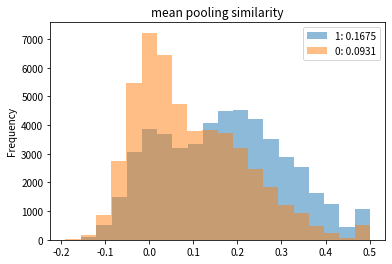

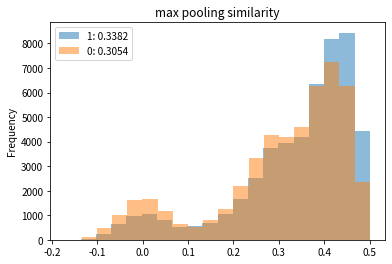

In [51]:
import matplotlib.pyplot as plt

mean_1 = corpus_train_df[corpus_train_df['label'] == 1]['wv_mean_sim'].mean()
mean_0 = corpus_train_df[corpus_train_df['label'] == 0]['wv_mean_sim'].mean()
corpus_train_df[corpus_train_df['label'] == 1]['wv_mean_sim'].plot.hist(bins=20, alpha=0.5, label=f'1: {mean_1:.4f}')
corpus_train_df[corpus_train_df['label'] == 0]['wv_mean_sim'].plot.hist(bins=20, alpha=0.5, label=f'0: {mean_0:.4f}')
plt.title('mean pooling similarity')
plt.legend()
plt.show()

mean_1 = corpus_train_df[corpus_train_df['label'] == 1]['wv_max_sim'].mean()
mean_0 = corpus_train_df[corpus_train_df['label'] == 0]['wv_max_sim'].mean()
corpus_train_df[corpus_train_df['label'] == 1]['wv_max_sim'].plot.hist(bins=20, alpha=0.5, label=f'1: {mean_1:.4f}')
corpus_train_df[corpus_train_df['label'] == 0]['wv_max_sim'].plot.hist(bins=20, alpha=0.5, label=f'0: {mean_0:.4f}')
plt.title('max pooling similarity')
plt.legend()
plt.show()


<AxesSubplot:ylabel='Frequency'>

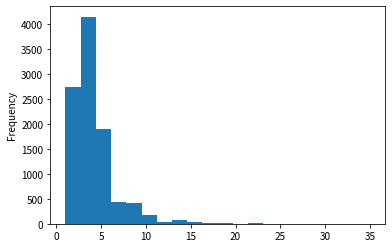

In [110]:
corpus_dev_df['cut_text2'].apply(lambda x: len(str(x).split())).plot.hist(bins=20)

**任务5：搭建SiamCNN/LSTM模型，训练和预测**

- **步骤1** ：将训练好的word2vec作为深度学习embeeding层的初始化参数。
- **步骤2** ：搭建SiamCNN（Word2Vec句子编码 + 1D CNN +FC）的孪生网络结构，完成训练和预测，提交测试集预测结果。
- **步骤3** ：搭建SiamLSTM（Word2Vec句子编码 + LSTM + FC）的孪生网络结构，完成训练和预测，提交测试集预测结果。

In [134]:
import pandas as pd 
import numpy as np

def converter(instr):
    return np.fromstring(instr[1:-1],sep=' ')
convert_cols = ['mean_pooling1', 'mean_pooling2', 'max_pooling1', 'max_pooling2','tfidf_pooling1', 'tfidf_pooling2']

corpus_train_df = pd.read_csv('data/bq_corpus/train_feature.tsv', sep='\t', 
                              converters={col: converter for col in convert_cols})
corpus_dev_df = pd.read_csv('data/bq_corpus/dev_feature.tsv', sep='\t',
                              converters={col: converter for col in convert_cols})
corpus_test_df = pd.read_csv('data/bq_corpus/test_feature.tsv', sep='\t',
                              converters={col: converter for col in convert_cols})

lcqmc_train_df = pd.read_csv('data/lcqmc/train_feature.tsv', sep='\t', 
                              converters={col: converter for col in convert_cols})
lcqmc_dev_df = pd.read_csv('data/lcqmc/dev_feature.tsv', sep='\t',
                              converters={col: converter for col in convert_cols})
lcqmc_test_df = pd.read_csv('data/lcqmc/test_feature.tsv', sep='\t',
                              converters={col: converter for col in convert_cols})

paws_train_df = pd.read_csv('data/paws-x-zh/train_feature.tsv', sep='\t', 
                              converters={col: converter for col in convert_cols})
paws_dev_df = pd.read_csv('data/paws-x-zh/dev_feature.tsv', sep='\t',
                              converters={col: converter for col in convert_cols})
paws_test_df = pd.read_csv('data/paws-x-zh/test_feature.tsv', sep='\t',
                              converters={col: converter for col in convert_cols})

In [135]:
train_df = pd.concat([corpus_train_df[['cut_text1', 'cut_text2', 'label']],
                      lcqmc_train_df[['cut_text1', 'cut_text2', 'label']],
                      paws_train_df[['cut_text1', 'cut_text2', 'label']]], axis=0)
dev_df = pd.concat([corpus_dev_df[['cut_text1', 'cut_text2', 'label']],
                      lcqmc_dev_df[['cut_text1', 'cut_text2', 'label']],
                      paws_dev_df[['cut_text1', 'cut_text2', 'label']]], axis=0)
del corpus_train_df
del corpus_dev_df
del lcqmc_train_df
del lcqmc_dev_df
del paws_train_df
del paws_dev_df

In [136]:
import gensim
import torch
import torch.nn as nn

model = gensim.models.Word2Vec.load('w2v.model')
weights = torch.FloatTensor(model.wv.vectors)
config = {'embedding_size': 100,
          'feature_size': 100,
          'window_sizes': [2, 3, 4],
          'num_layers': 2,
          'hidden_size': 64,
          'max_len': 25}

unk_idx = len(model.wv.key_to_index)
pad_idx = unk_idx + 1

model.wv.key_to_index['<UNK>'] = unk_idx
model.wv.key_to_index['<PAD>'] = pad_idx

model.wv.index_to_key.extend(['<UNK>', '<PAD>'])

weights = torch.FloatTensor(np.concatenate((model.wv.vectors, np.zeros((2, 100))), axis=0))

config['vocab_size'] = len(model.wv.key_to_index)

In [137]:
batch_size = 64

In [138]:
from torch.utils.data import DataLoader, Dataset

class MyDataset(Dataset):
    def __init__(self, model, df, train=True):
        self.model = model
        self.df = df
        self.train = train
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        text1 = str(self.df.iloc[idx]['cut_text1']).split()
        text2 = str(self.df.iloc[idx]['cut_text2']).split()
        out1 = [self.model.wv.key_to_index.get(t1, unk_idx) for t1 in text1]
        out2 = [self.model.wv.key_to_index.get(t2, unk_idx) for t2 in text2]
        len1 = min(len(text1), max_len)
        len2 = min(len(text2), max_len)
        if len(out1) > max_len:
            out1 = out1[:max_len]
        else:
            out1 += [pad_idx] * (max_len - len(out1))
        if len(out2) > max_len:
            out2 = out2[:max_len]
        else:
            out2 += [pad_idx] * (max_len - len(out2))
            
        if self.train:
            return torch.tensor(out1), torch.tensor(out2), len1, len2, torch.tensor(self.df.iloc[idx]['label'])
        
        return torch.tensor(out1), torch.tensor(out2), len1, len2

In [139]:
train_ds = MyDataset(model, train_df)
dev_ds = MyDataset(model, dev_df)

corpus_test_ds = MyDataset(model, corpus_test_df, train=False)
lcqmc_test_ds = MyDataset(model, lcqmc_test_df, train=False)
paws_test_ds = MyDataset(model, paws_test_df, train=False)

train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
dev_dl = DataLoader(dev_ds, batch_size=batch_size, shuffle=True)

corpus_test_dl = DataLoader(corpus_test_ds, batch_size=batch_size, shuffle=False)
lcqmc_test_dl = DataLoader(lcqmc_test_ds, batch_size=batch_size, shuffle=False)
paws_test_dl = DataLoader(paws_test_ds, batch_size=batch_size, shuffle=False)

In [140]:
from datetime import datetime

def printbar():
    nowtime = datetime.now()
    print('========' * 8 + nowtime.strftime('%H:%M:%S'))

In [141]:
class SiamCNN(nn.Module):
    def __init__(self, config):
        super(SiamCNN, self).__init__()
        self.embedding = nn.Embedding(config['vocab_size'], config['embedding_size'], padding_idx=pad_idx)
        self.convs = nn.ModuleList([
            nn.Sequential(nn.Conv2d(1, config['feature_size'], (kernel_size, config['embedding_size'])),
                          nn.LeakyReLU(inplace=True),
                          nn.AdaptiveAvgPool2d(1))
            for kernel_size in config['window_sizes']
        ])
    
        self.fc = nn.Sequential(nn.Linear(config['feature_size'] * len(config['window_sizes']), 100),
                                nn.Dropout(0.5),
                                nn.ReLU(inplace=True),
                                nn.Linear(100, 16))
        
        self.clf = nn.Sequential(nn.Linear(64, 16), nn.ReLU(inplace=True), nn.Linear(16, 2))
        
    def forward_once(self, x):
        embed = self.embedding(x) # [batch_size, seq_len, embedding_size]
        embed.unsqueeze_(1)
        conv_out = [conv(embed) for conv in self.convs]
        out = torch.cat(conv_out, dim=1)
        out = out.view(x.size(0), -1)
        return self.fc(out)
    
    def cross_layer(self, x1, x2):
        f1 = torch.mul(x1, x2)
        f2 = torch.abs(x1 - x2)
        return torch.cat([x1, x2, f1, f2], axis=1)
    
    def forward(self, x1, x2):
        out1 = self.forward_once(x1)
        out2 = self.forward_once(x2)
        cross_feature = self.cross_layer(out1, out2)
        out = self.clf(cross_feature)
        return out

In [142]:
siamcnn = SiamCNN(config)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(siamcnn.parameters(), lr=1e-3)


def train(net, epochs, loss_fn, train_dl, valid_dl, optimizer, rnn=False):
    net.train()
    printbar()
    print('Start Training...')
    total_train_loss = []
    total_valid_loss = []
    for epoch in range(epochs):
        epoch_train_loss = 0
        count = 0
        for x1, x2, len1, len2, y in train_dl:
            optimizer.zero_grad()
            if rnn == True:
                y_out = net(x1, x2, len1, len2)
            else:
                y_out = net(x1, x2)
            loss = loss_fn(y_out, y)
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item()
            y_pred = torch.max(y_out, 1)[1]
            count += (y_pred.numpy() == y.numpy()).mean()
        train_acc = count / len(train_dl)
        train_loss = epoch_train_loss / len(train_dl)
        valid_loss, valid_acc = evaluate(net, loss_fn, valid_dl, rnn)
        printbar()
        print(f'Epoch: {epoch+1}, train loss: {train_loss:.4f}, valid loss: {valid_loss:.4f}, train_acc: {train_acc:.4f}, valid_acc: {valid_acc:.4f}')
        total_train_loss.append(train_loss)
        total_valid_loss.append(valid_loss)
    return total_train_loss, total_valid_loss

def evaluate(net, loss_fn, valid_dl, rnn):
    net.eval()
    valid_loss = 0
    count = 0
    with torch.no_grad():
        for x1, x2, len1, len2, y in valid_dl:
            if rnn == True:
                y_out = net(x1, x2, len1, len2)
            else:
                y_out = net(x1, x2)
            loss = loss_fn(y_out, y)
            valid_loss += loss.item()
            y_pred = torch.max(y_out, 1)[1]
            count += (y_pred.numpy() == y.numpy()).mean()
    return valid_loss / len(valid_dl), count / len(valid_dl)

In [143]:
import pandas as pd 

def predict(net, test_dl, rnn=False):
    y_pred = []
    for x1, x2, len1, len2 in test_dl:
        if rnn == True:
            y_out = net(x1, x2, len1, len2)
        else:
            y_out = net(x1, x2)
        y_pred.extend(torch.max(y_out, 1)[1].tolist())
    return y_pred

In [144]:
epochs = 10
train_loss, valid_loss = train(siamcnn, epochs, loss_fn, train_dl, dev_dl, optimizer)

================================================================17:37:51
Start Training...
================================================================17:47:08
Epoch: 1, train loss: 0.5808, valid loss: 0.6600, train_acc: 0.6927, valid_acc: 0.6529
================================================================17:55:48
Epoch: 2, train loss: 0.4588, valid loss: 0.5962, train_acc: 0.7784, valid_acc: 0.6947
================================================================18:04:24
Epoch: 3, train loss: 0.3901, valid loss: 0.6039, train_acc: 0.8211, valid_acc: 0.7098
================================================================18:12:59
Epoch: 4, train loss: 0.3358, valid loss: 0.6026, train_acc: 0.8521, valid_acc: 0.7284
================================================================18:21:34
Epoch: 5, train loss: 0.2883, valid loss: 0.6404, train_acc: 0.8774, valid_acc: 0.7249
================================================================18:30:09
Epoch: 6, train loss: 0.2483, valid 

In [145]:
torch.save(siamcnn.state_dict, 'siamcnn.model')

In [146]:
corpus_pred_cnn = predict(siamcnn, corpus_test_dl)
lcqmc_pred_cnn = predict(siamcnn, lcqmc_test_dl)
paws_pred_cnn = predict(siamcnn, paws_test_dl)

In [147]:
pd.DataFrame(corpus_pred_cnn, columns=['prediction']).to_csv('submit/siamcnn/bq_corpus.tsv', sep='\t', index_label='index')
pd.DataFrame(lcqmc_pred_cnn, columns=['prediction']).to_csv('submit/siamcnn/lcqmc.tsv', sep='\t', index_label='index')
pd.DataFrame(paws_pred_cnn, columns=['prediction']).to_csv('submit/siamcnn/paws-x.tsv', sep='\t', index_label='index')

In [148]:
import matplotlib.pyplot as plt 

def plot_loss(train_loss, valid_loss, title):
    plt.plot(train_loss, label='train loss')
    plt.plot(valid_loss, label='valid loss')
    plt.plot(title=title)
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

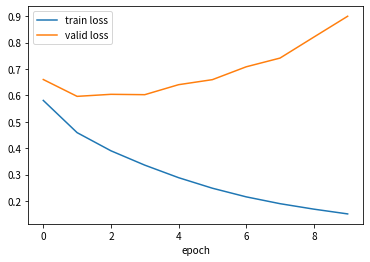

In [149]:
plot_loss(train_loss, valid_loss, 'loss')

In [150]:
class SiamGRU(nn.Module):
    def __init__(self, config):
        super(SiamGRU, self).__init__()
        self.embedding = nn.Embedding(config['vocab_size'], 
                                      config['embedding_size'], 
                                      padding_idx=pad_idx)
        
        self.gru = nn.GRU(config['embedding_size'], 
                          config['hidden_size'],
                          num_layers=config['num_layers'], 
                          bidirectional=True,
                          batch_first=True, 
                          dropout=0.5)
    
        self.clf = nn.Sequential(nn.Linear(8 * config['hidden_size'], config['hidden_size']),
                                 nn.ReLU(inplace=True),
                                 nn.Dropout(0.5),
                                 nn.Linear(config['hidden_size'], 2))
        
    def cross_layer(self, x1, x2):
        f1 = torch.mul(x1, x2)
        f2 = torch.abs(x1 - x2)
        return torch.cat([x1, x2, f1, f2], axis=1)
    
    def forward_once(self, x, text_len):
        embed = self.embedding(x)
        output, _ = self.gru(embed) # batch_size, seq_len, 2 * hidden_size
        avg_out = torch.mean(output, 1)
        return avg_out
        
    def forward(self, x1, x2, text_len1, text_len2):
        out1 = self.forward_once(x1, text_len1)
        out2 = self.forward_once(x2, text_len2)
        cross_features = self.cross_layer(out1, out2)
        out = self.clf(cross_features)
        return out

In [151]:
epochs = 10
loss_fn = nn.CrossEntropyLoss()
siamgru = SiamGRU(config)
optimizer = torch.optim.Adam(siamgru.parameters(), lr=1e-3)

train_loss, valid_loss = train(siamgru, epochs, loss_fn, train_dl, dev_dl, optimizer, rnn=True)

================================================================19:04:42
Start Training...
================================================================19:17:39
Epoch: 1, train loss: 0.4959, valid loss: 0.6117, train_acc: 0.7611, valid_acc: 0.7076
================================================================19:30:34
Epoch: 2, train loss: 0.3795, valid loss: 0.5438, train_acc: 0.8324, valid_acc: 0.7317
================================================================19:43:29
Epoch: 3, train loss: 0.3078, valid loss: 0.5728, train_acc: 0.8697, valid_acc: 0.7462
================================================================19:57:10
Epoch: 4, train loss: 0.2528, valid loss: 0.6055, train_acc: 0.8958, valid_acc: 0.7466
================================================================20:11:38
Epoch: 5, train loss: 0.2099, valid loss: 0.6458, train_acc: 0.9162, valid_acc: 0.7459
================================================================20:26:08
Epoch: 6, train loss: 0.1781, valid 

In [153]:
corpus_pred_gru = predict(siamgru, corpus_test_dl, rnn=True)
lcqmc_pred_gru = predict(siamgru, lcqmc_test_dl, rnn=True)
paws_pred_gru = predict(siamgru, paws_test_dl, rnn=True)

pd.DataFrame(corpus_pred_gru, columns=['prediction']).to_csv('submit/siamgru/bq_corpus.tsv', sep='\t', index_label='index')
pd.DataFrame(lcqmc_pred_gru, columns=['prediction']).to_csv('submit/siamgru/lcqmc.tsv', sep='\t', index_label='index')
pd.DataFrame(paws_pred_gru, columns=['prediction']).to_csv('submit/siamgru/paws-x.tsv', sep='\t', index_label='index')

In [154]:
torch.save(siamgru.state_dict, 'siamgru.model')

**任务6：搭建InferSent模型，训练和预测**

- **步骤1** ：将训练好的word2vex作为深度学习embeeding层的初始化参数。
- **步骤2** ：搭建InferSent模型，尝试不同的交叉方法。
- **步骤3** ：训练InferSent模型，提交测试集预测结果。

In [155]:
class InferSent(nn.Module):
    def __init__(self, config):
        super(InferSent, self).__init__()
        self.embedding = nn.Embedding(len(model.wv.key_to_index), config['embedding_size'], padding_idx=pad_idx)
        self.lstm = nn.LSTM(config['embedding_size'],
                          config['hidden_size'],
                          num_layers=config['num_layers'],
                          bidirectional=True,
                          batch_first=True,
                          dropout=0.5)
        self.fc = nn.Sequential(nn.Linear(config['hidden_size'] * 8, config['hidden_size']),
                                nn.Dropout(0.5),
                                nn.ReLU(),
                                nn.Linear(config['hidden_size'], 2))
    
    def cross_layer(self, x1, x2):
        f1 = torch.mul(x1, x2)
        f2 = torch.abs(x1 - x2)
        return torch.cat([x1, x2, f1, f2], axis=1)
    
    def forward_once(self, x, text_len):
        embed = self.embedding(x) 
        output, _ = self.lstm(embed) 
        sent_embed = torch.sum(output, axis=1) 
        text_len = text_len.unsqueeze(1)
        pooled = sent_embed / text_len.expand_as(sent_embed)
        return pooled
        
    def forward(self, x1, x2, len1, len2):
        out1 = self.forward_once(x1, len1)
        out2 = self.forward_once(x2, len2)
        cross_feature = self.cross_layer(out1, out2)
        out = self.fc(cross_feature)
        return out
    

In [156]:
epochs = 10
loss_fn = nn.CrossEntropyLoss()
infersent = InferSent(config)
optimizer = torch.optim.Adam(infersent.parameters(), lr=1e-2)

train_loss, valid_loss = train(infersent, epochs, loss_fn, train_dl, dev_dl, optimizer, rnn=True)

================================================================21:21:49
Start Training...
================================================================21:35:56
Epoch: 1, train loss: 0.5741, valid loss: 0.7593, train_acc: 0.7027, valid_acc: 0.6514
================================================================21:50:37
Epoch: 2, train loss: 0.4491, valid loss: 0.6188, train_acc: 0.7911, valid_acc: 0.6971
================================================================22:04:55
Epoch: 3, train loss: 0.4320, valid loss: 0.6170, train_acc: 0.8014, valid_acc: 0.6937
================================================================22:20:12
Epoch: 4, train loss: 0.4255, valid loss: 0.6073, train_acc: 0.8058, valid_acc: 0.6967
================================================================22:37:17
Epoch: 5, train loss: 0.4218, valid loss: 0.6022, train_acc: 0.8073, valid_acc: 0.6954
================================================================22:55:52
Epoch: 6, train loss: 0.4203, valid 

In [157]:
torch.save(infersent.state_dict, 'infersent.model')

**任务7：搭建ESIM模型，训练和预测**

- **步骤1** ：将训练好的word2vec作为深度学习embeeding层的初始化参数。
- **步骤2** ：搭建ESIM模型，尝试不同的交叉方法。
- **步骤3** ：训练ESIM模型，提交测试集预测结果。

In [158]:
from torch.nn import functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

class ESIM(nn.Module):
    def __init__(self, config):
        super(ESIM, self).__init__()
        self.embedding = nn.Embedding(config['vocab_size'], config['embedding_size'], padding_idx=pad_idx)
        self.lstm1 = nn.LSTM(config['embedding_size'], config['hidden_size'],
                             num_layers=config['num_layers'],
                             bidirectional=True,
                             batch_first=True,
                             dropout=0.5)
        self.lstm2 = nn.LSTM(8 * config['hidden_size'], config['hidden_size'],
                             num_layers=config['num_layers'],
                             bidirectional=True,
                             batch_first=True,
                             dropout=0.5)
        self.avg_pool = nn.AdaptiveAvgPool1d(1)
        self.max_pool = nn.AdaptiveMaxPool1d(1)
        
        self.fc = nn.Sequential(nn.Linear(8 * config['hidden_size'], config['hidden_size']),
                                nn.ReLU(),
                                nn.Dropout(0.5),
                                nn.Linear(config['hidden_size'], 2))
    
    def soft_align_attention(self, x1, x2, mask1, mask2):
        attention = torch.matmul(x1, x2.transpose(1, 2))
        mask1 = mask1.float().masked_fill_(mask1, float('-inf'))
        mask2 = mask2.float().masked_fill_(mask2, float('-inf'))
        
        weight1 = F.softmax(attention + mask2.unsqueeze(1), dim=-1)
        x1_align = torch.matmul(weight1, x2)
        weight2 = F.softmax(attention.transpose(1, 2) + mask1.unsqueeze(1), dim=-1)
        x2_align = torch.matmul(weight2, x1)

        return x1_align, x2_align   
    
    def submul(self, x1, x2):
        sub = x1 - x2
        mul = x1 * x2
        return torch.cat([sub, mul], axis=-1)
    
    def pool(self, x):
        # x = [batch_size, seq_len, 2 * hidden_size]
        avg_pooled = self.avg_pool(x.transpose(1, 2)).squeeze(-1)
        max_pooled = self.max_pool(x.transpose(1, 2)).squeeze(-1)
        return torch.cat([avg_pooled, max_pooled], axis=-1)
    
    def forward(self, x1, x2, text_len1, text_len2):
        emb1 = self.embedding(x1)
        emb2 = self.embedding(x2)
        
        packed_emb1 = pack_padded_sequence(emb1, text_len1, batch_first=True, enforce_sorted=False)
        packed_emb2 = pack_padded_sequence(emb2, text_len2, batch_first=True, enforce_sorted=False)
        o1, _ = self.lstm1(packed_emb1)
        o2, _ = self.lstm1(packed_emb2)
        o1, _ = pad_packed_sequence(o1, batch_first=True, total_length=config['max_len'])
        o2, _ = pad_packed_sequence(o2, batch_first=True, total_length=config['max_len'])
        
        mask1 = x1.eq(pad_idx)
        mask2 = x2.eq(pad_idx)
        
        x1_align, x2_align = self.soft_align_attention(o1, o2, mask1, mask2)
        x1_combined = torch.cat([o1, x1_align, self.submul(o1, x1_align)], axis=-1)
        x2_combined = torch.cat([o2, x2_align, self.submul(o2, x2_align)], axis=-1)
        
        packed_x1_combined = pack_padded_sequence(x1_combined, text_len1, batch_first=True, enforce_sorted=False)
        packed_x2_combined = pack_padded_sequence(x2_combined, text_len2, batch_first=True, enforce_sorted=False)
        x1_compose, _ = self.lstm2(packed_x1_combined)
        x2_compose, _ = self.lstm2(packed_x2_combined)
        x1_compose, _ = pad_packed_sequence(x1_compose, batch_first=True, total_length=config['max_len'])
        x2_compose, _ = pad_packed_sequence(x2_compose, batch_first=True, total_length=config['max_len'])
        
        x1_pooled = self.pool(x1_compose)
        x2_pooled = self.pool(x2_compose)
        combined_feature = torch.cat([x1_pooled, x2_pooled], axis=-1)
        sim = self.fc(combined_feature)
        return sim

In [159]:
epochs = 10
loss_fn = nn.CrossEntropyLoss()
esim = ESIM(config)
optimizer = torch.optim.Adam(esim.parameters(), lr=1e-3)

train_loss, valid_loss = train(esim, epochs, loss_fn, train_dl, dev_dl, optimizer, rnn=True)

================================================================00:20:13
Start Training...
================================================================00:36:32
Epoch: 1, train loss: 0.5097, valid loss: 0.5923, train_acc: 0.7532, valid_acc: 0.7045
================================================================00:52:41
Epoch: 2, train loss: 0.3732, valid loss: 0.5523, train_acc: 0.8370, valid_acc: 0.7415
================================================================01:08:50
Epoch: 3, train loss: 0.2965, valid loss: 0.5565, train_acc: 0.8768, valid_acc: 0.7546
================================================================01:24:57
Epoch: 4, train loss: 0.2402, valid loss: 0.5867, train_acc: 0.9027, valid_acc: 0.7564
================================================================01:41:05
Epoch: 5, train loss: 0.1987, valid loss: 0.6185, train_acc: 0.9211, valid_acc: 0.7598
================================================================01:57:17
Epoch: 6, train loss: 0.1679, valid 

In [160]:
corpus_pred_esim = predict(esim, corpus_test_dl, rnn=True)
lcqmc_pred_esim = predict(esim, lcqmc_test_dl, rnn=True)
paws_pred_esim = predict(esim, paws_test_dl, rnn=True)

pd.DataFrame(corpus_pred_esim, columns=['prediction']).to_csv('submit/esim/bq_corpus.tsv', sep='\t', index_label='index')
pd.DataFrame(lcqmc_pred_esim, columns=['prediction']).to_csv('submit/esim/lcqmc.tsv', sep='\t', index_label='index')
pd.DataFrame(paws_pred_esim, columns=['prediction']).to_csv('submit/esim/paws-x.tsv', sep='\t', index_label='index')

In [161]:
torch.save(esim.state_dict, 'esim.model')

**任务8：使用BERT或ERNIE完成NSP任务**

- 参考代码：
  - https://aistudio.baidu.com/aistudio/projectdetail/3168859
  - [bert-nsp代码](https://gitee.com/coggle/competition-baseline/blob/master/competition/科大讯飞AI开发者大赛2021/中文问题相似度挑战赛/bert-nsp-xunfei.ipynb)
- **步骤1** ：学习Bert模型的使用。
- **步骤2** ：使用Bert完成NSP任务的训练和预测，提交测试集预测结果。

In [1]:
import pandas as pd
import numpy as np
import random
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

from transformers import BertTokenizer

DataSet_Path = {
    'lcqmc':
            {'train':'data/lcqmc/train.tsv',
             'dev':'data/lcqmc/dev.tsv',
             'test':'data/lcqmc/test.tsv'},
    'paws':
            {'train':'data/paws-x-zh/train.tsv',
             'dev':'data/paws-x-zh/dev.tsv',
             'test':'data/paws-x-zh/test.tsv'},
    'corpus':
            {'train':'data/bq_corpus/train.tsv',
             'dev':'data/bq_corpus/dev.tsv',
             'test':'data/bq_corpus/test.tsv'}
}

In [2]:
def converter(instr):
    return np.fromstring(instr[1:-1],sep=' ')

convert_cols = ['mean_pooling1', 'mean_pooling2', 'max_pooling1', 'max_pooling2','tfidf_pooling1', 'tfidf_pooling2']

corpus_train_df = pd.read_csv('data/bq_corpus/train_feature.tsv', sep='\t', 
                              converters={col: converter for col in convert_cols})
corpus_dev_df = pd.read_csv('data/bq_corpus/dev_feature.tsv', sep='\t',
                              converters={col: converter for col in convert_cols})
corpus_test_df = pd.read_csv('data/bq_corpus/test_feature.tsv', sep='\t',
                              converters={col: converter for col in convert_cols})

lcqmc_train_df = pd.read_csv('data/lcqmc/train_feature.tsv', sep='\t', 
                              converters={col: converter for col in convert_cols})
lcqmc_dev_df = pd.read_csv('data/lcqmc/dev_feature.tsv', sep='\t',
                              converters={col: converter for col in convert_cols})
lcqmc_test_df = pd.read_csv('data/lcqmc/test_feature.tsv', sep='\t',
                              converters={col: converter for col in convert_cols})

paws_train_df = pd.read_csv('data/paws-x-zh/train_feature.tsv', sep='\t', 
                              converters={col: converter for col in convert_cols})
paws_dev_df = pd.read_csv('data/paws-x-zh/dev_feature.tsv', sep='\t',
                              converters={col: converter for col in convert_cols})
paws_test_df = pd.read_csv('data/paws-x-zh/test_feature.tsv', sep='\t',
                              converters={col: converter for col in convert_cols})

train_df = pd.concat([corpus_train_df[['text1', 'text2', 'label']],
                      lcqmc_train_df[['text1', 'text2', 'label']],
                      paws_train_df[['text1', 'text2', 'label']]], axis=0)
dev_df = pd.concat([corpus_dev_df[['text1', 'text2', 'label']],
                      lcqmc_dev_df[['text1', 'text2', 'label']],
                      paws_dev_df[['text1', 'text2', 'label']]], axis=0)

del corpus_train_df
del corpus_dev_df
del lcqmc_train_df
del lcqmc_dev_df
del paws_train_df
del paws_dev_df

In [3]:
model_path = '/home/kuan/bert/bert-base-chinese/'

from datetime import datetime

def printbar():
    nowtime = datetime.now()
    print('========' * 8 + nowtime.strftime('%H:%M:%S'))

In [12]:
train_df = train_df[:1000]
dev_df = dev_df[:1000]

In [13]:
tokenizer = BertTokenizer(model_path + 'vocab.txt')
train_encodings = tokenizer(list(train_df['text1'].apply(str)), list(train_df['text2'].apply(str)), truncation='longest_first', padding='max_length', max_length=50)
dev_encodings = tokenizer(list(dev_df['text1']), list(dev_df['text2']), truncation='longest_first', padding='max_length', max_length=50)
corpus_test_encodings = tokenizer(list(corpus_test_df['text1']), list(corpus_test_df['text2']), truncation='longest_first', padding='max_length', max_length=50)
lcqmc_test_encodings = tokenizer(list(lcqmc_test_df['text1']), list(lcqmc_test_df['text2']), truncation='longest_first', padding='max_length', max_length=50)
paws_test_encodings = tokenizer(list(paws_test_df['text1']), list(paws_test_df['text2']), truncation='longest_first', padding='max_length', max_length=50)

In [14]:
class BertDataset(Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels
        
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['label'] = torch.tensor(int(self.labels[idx]))
        return item
    
    def __len__(self):
        return len(self.encodings['input_ids'])

In [15]:
from transformers import BertForNextSentencePrediction, AdamW, get_linear_schedule_with_warmup

batch_size = 64

train_ds = BertDataset(train_encodings, list(train_df['label']))
dev_ds = BertDataset(dev_encodings, list(dev_df['label']))

train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
dev_dl = DataLoader(dev_ds, batch_size=batch_size, shuffle=True)

In [16]:
corpus_test_ds = BertDataset(corpus_test_encodings)
lcqmc_test_ds = BertDataset(lcqmc_test_encodings)
paws_test_ds = BertDataset(paws_test_encodings)

corpus_test_dl = DataLoader(corpus_test_ds, batch_size=batch_size, shuffle=False)
lcqmc_test_dl = DataLoader(lcqmc_test_ds, batch_size=batch_size, shuffle=False)
paws_test_dl = DataLoader(paws_test_ds, batch_size=batch_size, shuffle=False)

In [17]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
bert_model = BertForNextSentencePrediction.from_pretrained(model_path).to(device)

optimizer = AdamW(bert_model.parameters(), lr=1e-5)
len_dataset = len(train_ds)
epochs = 10
total_steps = (len_dataset // batch_size) * epochs
warmup_ratio = 0.1
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=warmup_ratio * total_steps, num_training_steps=total_steps)

Some weights of the model checkpoint at /home/kuan/bert/bert-base-chinese/ were not used when initializing BertForNextSentencePrediction: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForNextSentencePrediction from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForNextSentencePrediction from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [18]:
def bert_train(bert, train_dl, valid_dl, epochs, optimizer, scheduler, device):
    bert.train()
    printbar()
    print('Start Training...')
    total_train_loss = []
    total_valid_loss = []
    iter_nums = 0
    for epoch in range(epochs):
        epoch_train_loss = 0
        count = 0
        for batch in train_dl:
            optimizer.zero_grad()
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)
            y_out = bert(input_ids, attention_mask=attention_mask, labels=labels)
            loss = y_out.loss
            loss.backward()
            optimizer.step()
            scheduler.step()
            epoch_train_loss += loss.item()
            y_pred = torch.max(y_out.logits, 1)[1]
            count += (y_pred.cpu().numpy() == labels.cpu().numpy()).mean()
        train_acc = count / len(train_dl)
        train_loss = epoch_train_loss / len(train_dl)
        valid_loss, valid_acc = evaluate(bert, valid_dl, device)
        printbar()
        print(f'Epoch: {epoch+1}, train loss: {train_loss:.4f}, valid loss: {valid_loss:.4f}, train_acc: {train_acc:.4f}, valid_acc: {valid_acc:.4f}')
        total_train_loss.append(train_loss)
        total_valid_loss.append(valid_loss)
        bert.save_pretrained(f'bert_epoch_{epoch}')
    return total_train_loss, total_valid_loss

def evaluate(bert, valid_dl, device):
    bert.eval()
    valid_loss = 0
    count = 0
    with torch.no_grad():
        for batch in valid_dl:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)
            y_out = bert(input_ids, attention_mask=attention_mask, labels=labels)
            loss = y_out.loss
            valid_loss += loss.item()
            y_pred = torch.max(y_out.logits, 1)[1]
            count += (y_pred.cpu().numpy() == labels.cpu().numpy()).mean()
    return valid_loss / len(valid_dl), count / len(valid_dl)

In [19]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [20]:
train_loss, valid_loss = bert_train(bert_model, train_dl, dev_dl, epochs, optimizer, scheduler, device)

================================================================11:43:33
Start Training...
================================================================11:45:31
Epoch: 1, train loss: 0.8901, valid loss: 0.6457, train_acc: 0.5208, valid_acc: 0.6478
================================================================11:47:35
Epoch: 2, train loss: 0.5988, valid loss: 0.6087, train_acc: 0.6875, valid_acc: 0.6736
================================================================11:50:15
Epoch: 3, train loss: 0.4525, valid loss: 0.6044, train_acc: 0.8036, valid_acc: 0.6895
================================================================11:53:06
Epoch: 4, train loss: 0.2724, valid loss: 0.7187, train_acc: 0.9028, valid_acc: 0.6786
================================================================11:55:21
Epoch: 5, train loss: 0.1233, valid loss: 0.8532, train_acc: 0.9663, valid_acc: 0.6786
================================================================11:57:44
Epoch: 6, train loss: 0.0436, valid 

In [21]:
def bert_predict(bert, test_dl):
    bert.eval()
    y_pred = []
    for batch in test_dl:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        y_out = bert(input_ids, attention_mask=attention_mask)
        y_pred.extend(torch.max(y_out.logits, 1)[1].tolist())
    return y_pred

In [ ]:
corpus_pred_bert = bert_predict(bert_model, corpus_test_dl)
lcqmc_pred_bert = bert_predict(bert_model, lcqmc_test_dl)
paws_pred_bert = bert_predict(bert_model, paws_test_dl)

pd.DataFrame(corpus_pred_bert, columns=['prediction']).to_csv('submit/bert/bq_corpus.tsv', sep='\t', index_label='index')
pd.DataFrame(lcqmc_pred_bert, columns=['prediction']).to_csv('submit/bert/lcqmc.tsv', sep='\t', index_label='index')
pd.DataFrame(paws_pred_bert, columns=['prediction']).to_csv('submit/bert/paws-x.tsv', sep='\t', index_label='index')